In [1]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC



In [2]:
# 1. Tải lại dữ liệu đã xử lý từ File 1
X_train = np.load('/Users/binhminh/Documents/Intro ML code /Data/X_train.npy')
X_test = np.load('/Users/binhminh/Documents/Intro ML code /Data/X_test.npy')
y_train = np.load('/Users/binhminh/Documents/Intro ML code /Data/y_train.npy')
y_test = np.load('/Users/binhminh/Documents/Intro ML code /Data/y_test.npy')

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np 

# 1. Define the model
model = SVC(random_state=42)

# 2. Define the parameter grid (ĐÃ ĐIỀU CHỈNH)

# Tối ưu cho kernel tuyến tính (linear)
param_grid_linear = {
    'C': [0.1, 1, 10, 100, 500, 1000, 5000], # Mở rộng C
    'kernel': ['linear'],
    'class_weight': [None, 'balanced'] # <-- BỔ SUNG
}

# Tối ưu cho kernel rbf (gaussian)
param_grid_rbf = {
    'C': [0.5, 1, 10, 50, 100],             # Tinh chỉnh C
    'kernel': ['rbf'],
    'gamma': ['scale', 0.001, 0.005, 0.01, 0.05], # Tinh chỉnh gamma
    'class_weight': [None, 'balanced'] # <-- BỔ SUNG
}

# Tối ưu cho kernel poly (đa thức)
param_grid_poly = {
    'C': [0.1, 1, 10, 100],                  # Mở rộng C
    'kernel': ['poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced'] # <-- BỔ SUNG
}

# Kết hợp các grids lại
param_grid_combined_revised = [param_grid_linear, param_grid_rbf, param_grid_poly]

# 3. Set up the grid search
# Số fits mới: (7*1) + (5*5) + (4*2*3) = 7 + 25 + 24 = 56 combinations.
# 56 combinations * 5 folds = 280 total fits. (Vẫn quản lý được)
grid_search = GridSearchCV(model, param_grid_combined_revised, cv=5, scoring='accuracy', n_jobs=-1)

# 4. Fit the model
grid_search.fit(X_train, y_train)

# 5. Print the best parameters
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: {:.4f}".format(grid_search.best_score_))

Best parameters found:  {'C': 10, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
Best score found: 0.9780


In [4]:
best_model_svm = grid_search.best_estimator_
# Fit the best model on the training data

model_name = "Support Vector Machine"
y_pred_svm = best_model_svm.predict(X_test)

acc = accuracy_score(y_test, y_pred_svm)
print(f"\nĐộ chính xác (Accuracy) của {model_name}: {acc*100:.2f}%")
print("-" * 30)
print("Báo cáo chi tiết (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred_svm))
print("-" * 30)
print(f'F1_Score: {classification_report(y_test, y_pred_svm, output_dict=True)["weighted avg"]["f1-score"]:.4f}')
print(f'Accuracy: {classification_report(y_test, y_pred_svm, output_dict=True)["accuracy"]:.4f}')


Độ chính xác (Accuracy) của Support Vector Machine: 99.12%
------------------------------
Báo cáo chi tiết (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

------------------------------
F1_Score: 0.9912
Accuracy: 0.9912


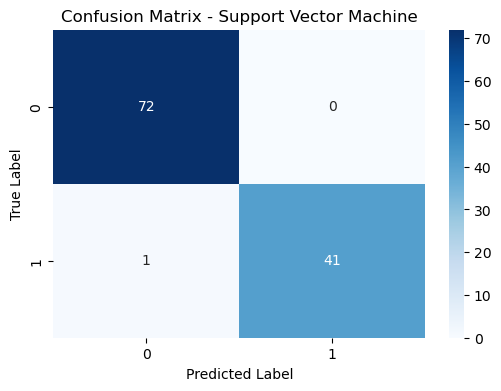

In [5]:
# 5. Vẽ Confusion Matrix (Tùy chọn để làm đẹp báo cáo)
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()